In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy import stats

Implemente una función que permita calcular el valor cuadrático medio (RMS) de una señal.

In [27]:
def xrms(N,x): #Entregar N como entero, x como array. N debe ser la cantidad de elementos de x.
    c=0
    for i in range(N):
        rms=x[i]**2
        c=c+rms
    xrms=((1/N)*c)**(1/2)
    return xrms


In [28]:
def numprms(x): #x es un array
    x_squared=np.square(x)
    x_mean=np.mean(x_squared)
    xrms=np.sqrt(x_mean)
    return xrms


In [29]:
#Lectura de los datos
data=scipy.io.loadmat('signals.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Apr 20 15:20:29 2015',
 '__version__': '1.0',
 '__globals__': [],
 'Fs': array([[1024]], dtype=uint16),
 'ECG_asRecording': array([[3904.31689453, 3939.203125  , 3976.00683594, ..., 4366.41064453,
         4365.31103516, 4370.91796875]]),
 'ECG_filtered': array([[ 8.87103896e-03,  5.62737497e+01,  8.57077127e+01, ...,
         -1.20952610e+02, -1.31734356e+02, -1.32898021e+02]]),
 'EMG_filtered1': array([[ 17.65905117,  19.41391578,  18.89666666, ..., 242.49414224,
         220.4135886 , 151.5810508 ]]),
 'EMG_filtered2': array([[  21.1780547 ,  -79.82418538, -133.65960989, ..., -384.58994036,
         -539.9349533 , -772.65519631]]),
 'EMG_asRecording1': array([[ 908.07531738,  903.17706299,  896.62982178, ..., 1433.91882324,
         1416.109375  , 1352.75012207]]),
 'EMG_asRecording2': array([[-3109.97558594, -3231.01391602, -3302.34960938, ...,
         -3791.24267578, -3924.6550293 , -4109.94433594]])}

A partir de la información suministrada en el archivo .mat, determine el tiempo de duración de las señales, cree un vector tiempo.

In [30]:
#Vector tiempo
Fs=data['Fs'][0][0] #frec de muestreo
N=np.shape(data['ECG_asRecording'])[1] #cantidad de muestras
t=np.linspace(0,(N/Fs),N) #vector, de 0 a 30min, dividido en la cantidad de muestras

Grafique la señal sin filtrar y filtrada, compárelas. Comente lo que observa, y desciba cómo debe ser el comportamiento del filtro que se utilizó. Recuerde las frecuencias de interés de la señal ECG.

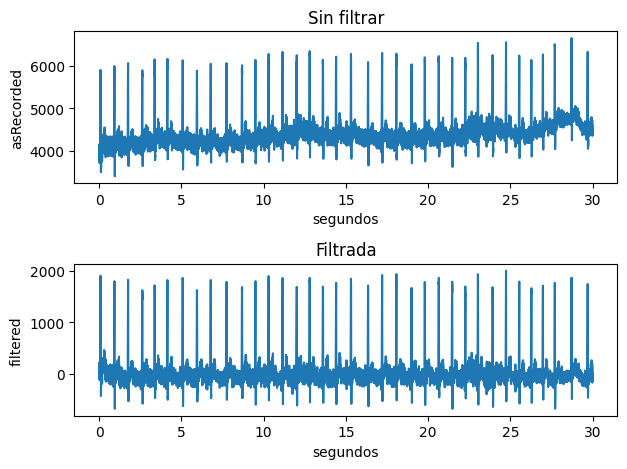

In [31]:
plt.subplot(211) #Señal sin filtro
plt.plot(t,data['ECG_asRecording'][0])
plt.title('Sin filtrar')
plt.xlabel('segundos')
plt.ylabel('asRecorded')
plt.subplot(212) #señal con filtro
plt.plot(t,data['ECG_filtered'][0],label='Filtrada')
plt.title('Filtrada')
plt.xlabel('segundos')
plt.ylabel('filtered')
plt.tight_layout()
#d 

Al comparar la señal sin filtrar con la señal filtrada del electrocardiograma (ECG), se pueden notar diferencias significativas que revelan el efecto del proceso de filtrado.

En la señal sin filtrar, se observan picos bastante pronunciados, alcanzando altos valores, los cuales representan los complejos QRS, componentes característicos del ECG asociados con la contracción ventricular. Sin embargo, también se aprecia la presencia de ruido en el resto de los complejos del ECG, lo cual puede dificultar la identificación precisa de los eventos cardíacos de interés.

Por otro lado, en la imagen filtrada, se nota un cambio notable en las amplitudes de la señal. Las amplitudes altas, que podrían ser causadas por fuentes de ruido como interferencia muscular o artefactos, parecen haber sido atenuadas significativamente por el filtro. Este efecto de filtrado de amplitudes altas es beneficioso en situaciones donde el ruido es prominente, ya que permite que los sobrepicos generados por el ruido sean reducidos o eliminados, dando prioridad a los valores más estables y representativos de la actividad cardíaca.




Tome la señal tal cual se registró. De dicha señal, seleccione un ciclo cardiaco, grafique. Calcule el promedio, el valor RMS, la varianza y la desviación estándar del ciclo. Analice los resultados.

Promedio: 4117.31206346284, RMS: 4127.435848292785, Varianza: 83468.05383574814, Desv. Estándar: 288.90838311781147


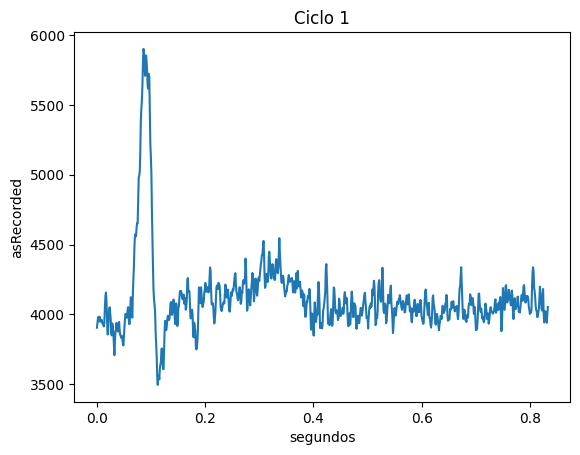

In [55]:
asRecorded=data['ECG_asRecording'][0]
u=854 #mediciones por ciclo
ciclo1=asRecorded[0:u] #por ahora, digamos que cada ciclo son 854 mediciones -->50 segundos
tciclo=t[0:u]
plt.plot(tciclo,ciclo1)
plt.title('Ciclo 1')
plt.xlabel('segundos')
plt.ylabel('asRecorded')
mean_ciclo1=np.mean(ciclo1) #promedio
rms_ciclo1=numprms(ciclo1)#rms
var_ciclo1=np.var(ciclo1) #varianza
std_ciclo1=np.std(ciclo1) #desv estandar
print(f'Promedio: {mean_ciclo1}, RMS: {rms_ciclo1}, Varianza: {var_ciclo1}, Desv. Estándar: {std_ciclo1}')

Tome la señal filtrada. Repita el procedimiento anterior con esta señal, compare con los resultados obtenidos en el ítem anterior.

Promedio: 86.54911385447427, RMS: [ 8.87103896e-03  5.62737497e+01  8.57077127e+01  7.99626863e+01
  5.40991061e+01  3.44026513e+01  3.82035401e+01  6.08058932e+01
  7.94865686e+01  7.19054518e+01  3.53743802e+01 -7.70055596e+00
 -2.32369606e+01  1.08470033e+01  8.71424979e+01  1.70208520e+02
  2.16955282e+02  2.02925458e+02  1.37275894e+02  5.67767925e+01
  3.07369089e+00 -1.78683411e+00  3.38580368e+01  7.98531073e+01
  1.04921962e+02  9.51126026e+01  5.85840621e+01  1.56366491e+01
 -1.71091265e+01 -3.66417573e+01 -5.15027204e+01 -7.10335354e+01
 -9.52924269e+01 -1.13654494e+02 -1.12879924e+02 -8.80668733e+01
 -4.78793991e+01 -9.98234616e+00  9.96559553e+00  7.74193690e+00
 -8.19615880e+00 -2.40892947e+01 -3.11128629e+01 -3.10135446e+01
 -3.34656812e+01 -4.76520255e+01 -7.45225472e+01 -1.05202382e+02
 -1.26207407e+02 -1.27304867e+02 -1.06532482e+02 -6.96577458e+01
 -2.56890221e+01  1.75258475e+01  5.46947169e+01  8.18527323e+01
  9.53243886e+01  9.31221308e+01  7.80479022e+01  5.9174

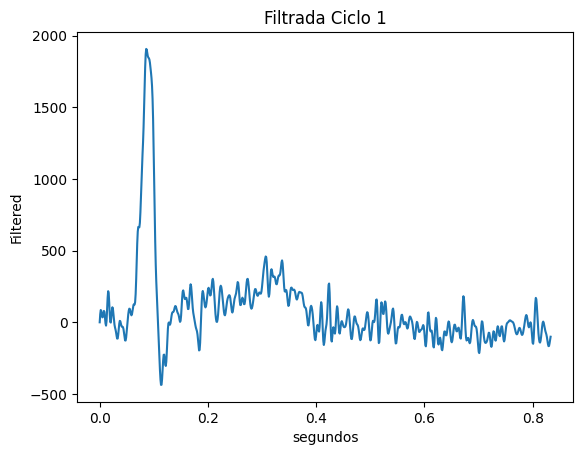

In [62]:
filtered=data['ECG_filtered'][0]
filtered_ciclo1=filtered[0:u] 
plt.plot(tciclo,filtered_ciclo1)
plt.title('Filtrada Ciclo 1')
plt.xlabel('segundos')
plt.ylabel('Filtered')
mean_filtered_ciclo1=np.mean(filtered_ciclo1) #promedio
rms_filtered_ciclo1=(filtered_ciclo1) #rms
var_filtered_ciclo1=np.var(filtered_ciclo1) #varianza
std_filtered_ciclo1=np.std(filtered_ciclo1) #desv estandar
print(f'Promedio: {mean_filtered_ciclo1}, RMS: {rms_filtered_ciclo1}, Varianza: {var_filtered_ciclo1}, Desv. Estándar: {std_filtered_ciclo1}')

Del filtrado se pueden apreciar patrones parecidos a los de la sección anterior, en la cual, el filtro usado, se acciona filtrando altas amplitudes, puesto que vemos que en el tiempo, los picos que alcanza la medición de voltaje en casi 4000 valores de cantidad de voltaje en medición. Mostrándonos el pico de mayor amplitud de al rededor de 1900, a diferencia de la señal sin filtrar que alcanza aproximadamente los 5900. Esto puede indicarnos fuentes de ruido altos, que no son necesarios para el correcto análisis de la medición del ECG, priorizando los valores más estables y reales. 

Extraiga 15 ciclos de la señal filtrada, y para cada ciclo calcule el valor promedio y la varianza, grafique cada ciclo y analice (grafica y estadísticamente). ¿Se puede considerar que la señal es estacionaria?

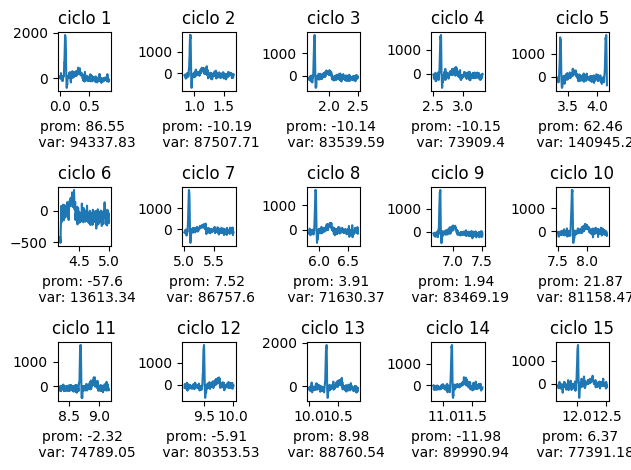

In [63]:
 #--> considerar cambiar u por los dos picos en el ciclo 5 y el ciclo 6
N_ciclos=15
ciclos=[]
for i in range(N_ciclos):
    i_t=t[u*i:u*(i+1)]
    i_ciclo=filtered[u*i:u*(i+1)]
    i_mean=np.round(np.mean(i_ciclo),2)
    i_var=np.round(np.var(i_ciclo),2)
    ciclos.append(i_ciclo)
    plt.subplot(3,5,i+1)
    plt.plot(i_t,i_ciclo)
    plt.title(f'ciclo {i+1}')
    plt.xlabel(f'prom: {i_mean} \n var: {i_var}')
plt.tight_layout()


Observando visualmente, podemos analizar en cada uno de los 15 ciclos, que en por lo menos 13 de ellos, se alcanzan a evidenciar patrones repetitivos, en los cual se puede interpretar en cada ciclo como un ciclo P-P del el electrocardiograma, en la cual resalta por su elevado pico en el complejo QRS, y podemos apreciar también que en el mismo transcurrir de tiempo para cada ciclo, los valores de medición de voltaje son similares entre ciclos, y a excepción del primer ciclo, los ciclos filtrados posteriores a este oscilan en valores promedios entre los -11.98 y los 21.87. Manteniéndose la mayoría de ciclos en estos rangos variables. Debido a estas características, en las cuales los ciclos tienen patrones bastante parecidos, podríamos trabajar estas señales como si fueran estacionarias, sin con toda exactitud serlo.  

Realice dos veces comparaciones entre dos ciclos cualquiera utilizando una prueba t. Determine estadísticamente si existe diferencia estadística entre los ciclos, compruebe los supuestos necesarios para realizar una prueba t, esto es: Normalidad de la variable, independencia (se asume que los grupos son independientes), y homocedasticidad (use una prueba de Levene), finalmente realice la prueba t para determinar si existen diferencias entre los ciclos. Qué indica este análisis respecto a la estacionariedad, explique. De no cumplirse los requisitos, realice entonces un análisis no paramétrico (prueba U de Mann-Whitney).

In [64]:
#NORMALIDAD -->sabemos que no es normal por la gráfica.
alpha=0.05 #valor de significancia
for i in range(4): #verificar normalidad de los 4 primeros ciclos
    [statistic,pvalue]=stats.normaltest(ciclos[i])
    if pvalue > alpha:
        print(f'Ciclo {i+1} distribuye normal')
    else:
        print(f'Ciclo {i+1} no distribuye normal')

Ciclo 1 no distribuye normal
Ciclo 2 no distribuye normal
Ciclo 3 no distribuye normal
Ciclo 4 no distribuye normal


Como ninguno tiene una distribución normal, no cumple supuestos para realizar la prueba t.

In [65]:
#HOMOCEDASTICIDAD 
[statistic,pvalue]=stats.levene(ciclos[0],ciclos[1],ciclos[2],ciclos[3])
if pvalue > alpha:
    print('Cumple supuesto de homocedasticidad') #varianzas no son significativamente diferentes
else:
    print('No cumple supuesto de homocedasticidad')

Cumple supuesto de homocedasticidad


In [66]:
#Mann-Whitney
#entre ciclos 1 y 2
[statistic,pvalue]=stats.mannwhitneyu(ciclos[0],ciclos[1])
if pvalue < alpha:
    print('Existe diferencia estadística entre los ciclos 1 y 2')
else:
    print('No existe diferencia significativa entre los ciclos 1 y 2') 
print(f'pvalue={pvalue}')
#entre ciclos 3 y 4
[statistic,pvalue]=stats.mannwhitneyu(ciclos[2],ciclos[3])
if pvalue < alpha:
    print('Existe diferencia estadística entre los ciclos 3 y 4')
else:
    print('No existe diferencia significativa entre los ciclos 3 y 4') 
print(f'pvalue={pvalue}')


Existe diferencia estadística entre los ciclos 1 y 2
pvalue=1.357468566416191e-38
No existe diferencia significativa entre los ciclos 3 y 4
pvalue=0.24305131737239127


El análisis respecto a la estacionariedad de la señal ECG se relaciona con la consistencia temporal de la señal a lo largo del tiempo. Si los ciclos de la señal son estadísticamente similares entre sí, esto sugiere que la señal es estacionaria en el sentido de que no hay cambios sistemáticos o tendencias a lo largo del tiempo. Como habíamos mencionado en un apartado anterior, los ciclos representados gráficamente, muestran parámetros de similitud, lo cual estos parámetros siguen condiciones que se repiten de forma similar a lo largo de los 15 ciclos. 
Con el valor p (pvalue) de 0.243 y un nivel de significancia (alfa) de 0.05, podemos realizar la comparación entre dos ciclos utilizando la prueba t. Dado que el valor p (pvalue) es mayor que el nivel de significancia (alfa), no rechazamos la hipótesis nula de que no hay diferencia estadísticamente significativa entre los ciclos en términos de la variable analizada. En otras palabras, no hay suficiente evidencia para afirmar que los ciclos difieren en promedio de manera significativa en relación con la variable analizada.
Por lo tanto, basándonos en este análisis, no encontramos diferencias estadísticamente significativas entre los ciclos en términos de la variable analizada, esto en cierta medida respalda la hipótesis de estacionariedad de la señal.

Compruebe los resultados anteriores aplicando una prueba de Dickey-Fuller a la señal (estacionariedad).

In [67]:
from statsmodels.tsa.stattools import adfuller
for i in range(4):
    dfuller=adfuller(ciclos[i])
    if dfuller[1] > alpha: #dfuller[1] es el valor p
        print(f'Datos del ciclo {i+1} son estacionarios') #esto puede ser así o al revés 
    else:
        print(f'Datos del ciclo {i+1} no son estacionarios')
    print(f'pvalue={dfuller[1]}')
    print(f'ADF={dfuller[0]}')

Datos del ciclo 1 son estacionarios
pvalue=0.4336443945976418
ADF=-1.6950892656104126
Datos del ciclo 2 son estacionarios
pvalue=0.42842882476902555
ADF=-1.7052125703949992
Datos del ciclo 3 son estacionarios
pvalue=0.2645869585865216
ADF=-2.0511937027093605
Datos del ciclo 4 son estacionarios
pvalue=0.4685523234096127
ADF=-1.62797219734903
